# Analysis - exp1000-50000_euc

- Transfer to Euclid after 1,000 to 50,000 episodes of training on Wythoff's

In [1]:
import os
import csv
import numpy as np
#import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

# Find the files

In [2]:
path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp1000_euc/"
exp_1000 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp5000_euc/"
exp_5000 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp10000_euc/"
exp_10000 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp50000_euc/"
exp_50000 = load_stumbler_data(path, (1, 21))

path = "/Users/Jack/Desktop/PNC/CoAx/azad-next-move/data/wythoff/exp28/"
exp_28 = load_stumbler_data(path, (1, 21))

In [3]:
pprint(exp_1000[0].keys())
pprint(exp_5000[0].keys())
pprint(exp_10000[0].keys())
pprint(exp_50000[0].keys())
pprint(exp_28[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])
dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [4]:
episode_1000,  exp_1000_avg,  _ = score_summary(exp_1000,  key="total_reward")
episode_5000,  exp_5000_avg,  _ = score_summary(exp_5000,  key="total_reward")
episode_10000, exp_10000_avg, _ = score_summary(exp_10000, key="total_reward")
episode_50000, exp_50000_avg, _ = score_summary(exp_50000, key="total_reward")
episode_28,    exp_28_avg,    _ = score_summary(exp_28,    key="total_reward")

# Plots

## Variations on V(s) projection

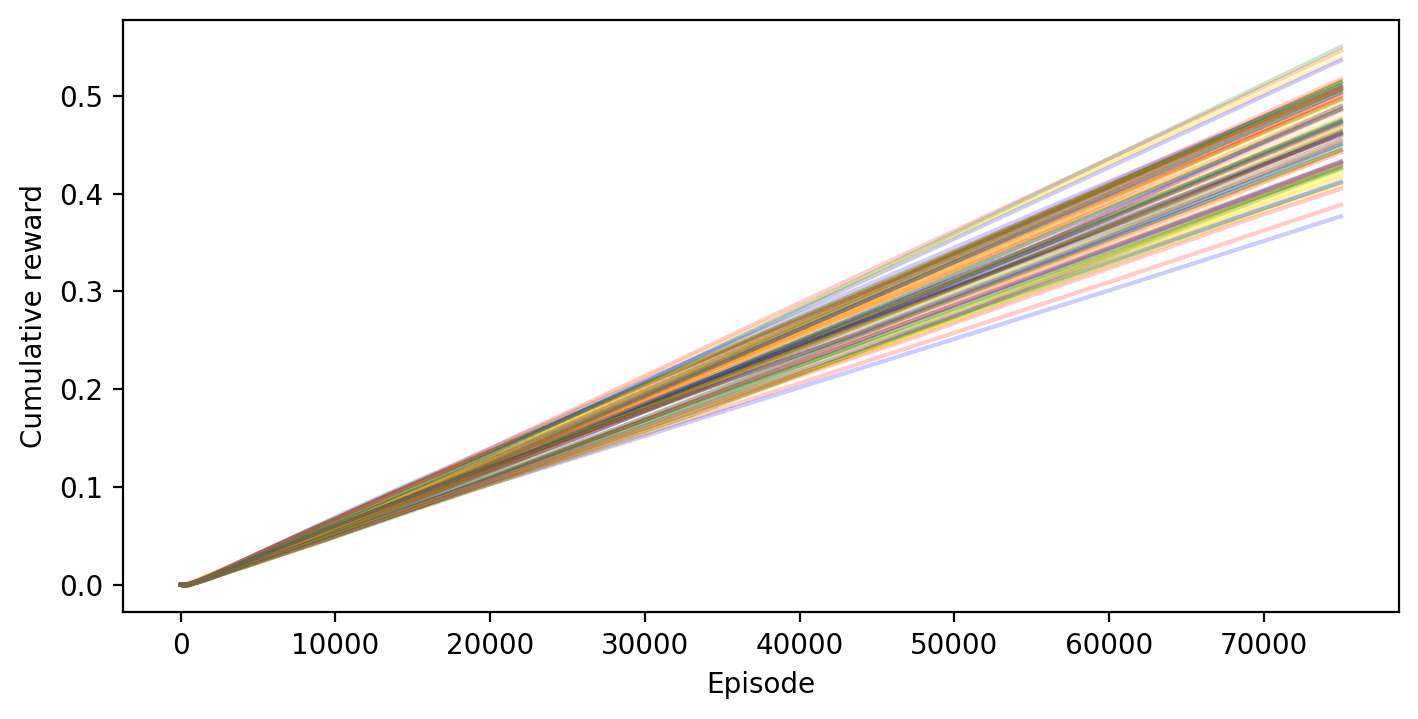

In [5]:
T = 5000
plt.figure(figsize=(7, 3.5))
for m1, m2, m3, m4, m5 in zip(exp_1000, exp_5000, exp_10000, exp_50000, exp_28):
    d1 = np.asarray(m1["total_reward"]) / np.max(m1["episode"])
    d2 = np.asarray(m2["total_reward"]) / np.max(m2["episode"])
    d3 = np.asarray(m3["total_reward"]) / np.max(m3["episode"])
    d4 = np.asarray(m4["total_reward"]) / np.max(m4["episode"])
    d5 = np.asarray(m5["total_reward"]) / np.max(m5["episode"])
    plt.plot(m1["episode"], d1, color="red",    alpha=0.2)
    plt.plot(m2["episode"], d2, color="orange", alpha=0.2)
    plt.plot(m3["episode"], d3, color="yellow", alpha=0.2)
    plt.plot(m4["episode"], d4, color="green",  alpha=0.2)
    plt.plot(m5["episode"], d5, color="blue",   alpha=0.2)

_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

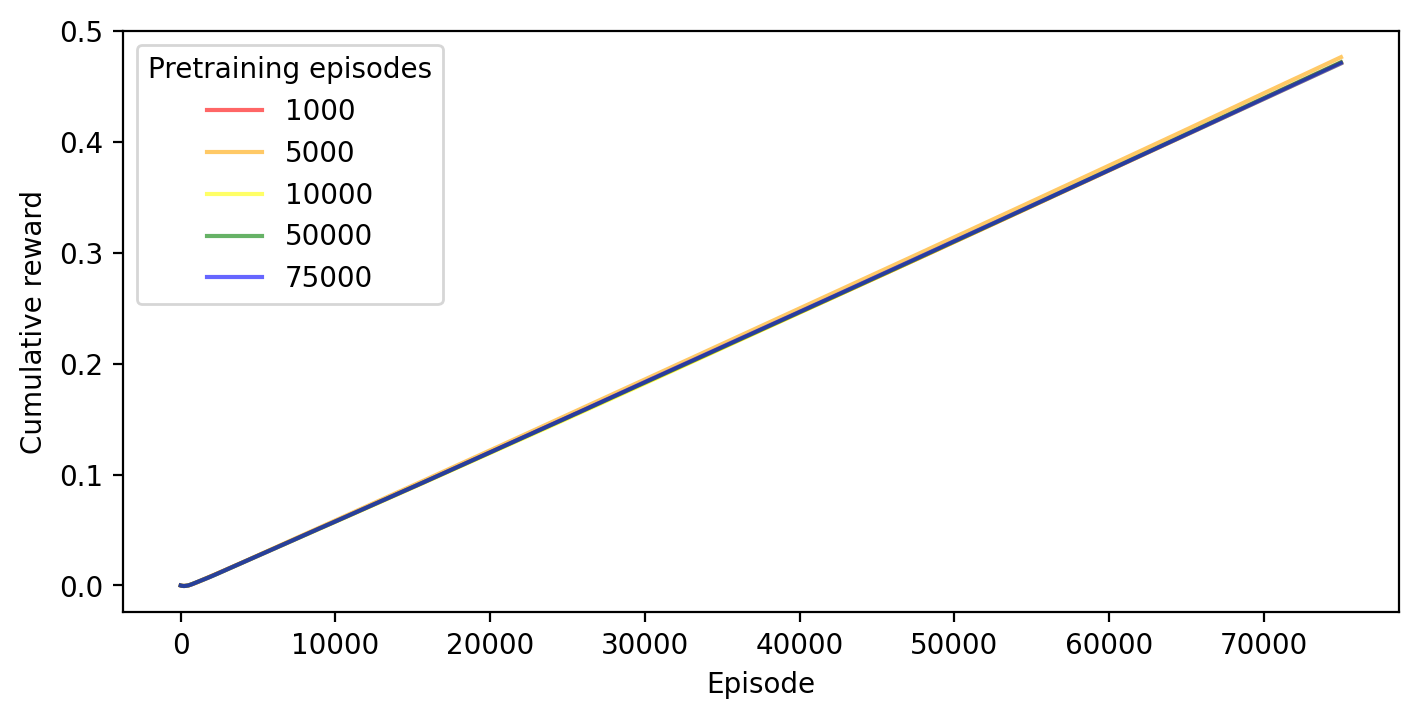

In [6]:
T = 5000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_1000,   exp_1000_avg/np.max(episode_1000),  color="red",    alpha=0.6, label="1000")
plt.plot(episode_5000,   exp_5000_avg/np.max(episode_5000),  color="orange", alpha=0.6, label="5000")
plt.plot(episode_10000, exp_10000_avg/np.max(episode_10000), color="yellow", alpha=0.6, label="10000")
plt.plot(episode_50000, exp_50000_avg/np.max(episode_50000), color="green",  alpha=0.6, label="50000")
plt.plot(episode_28, exp_28_avg/np.max(episode_28), color="blue", alpha=0.6, label="75000")
_ = plt.legend(title="Pretraining episodes")
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Cumulative reward")

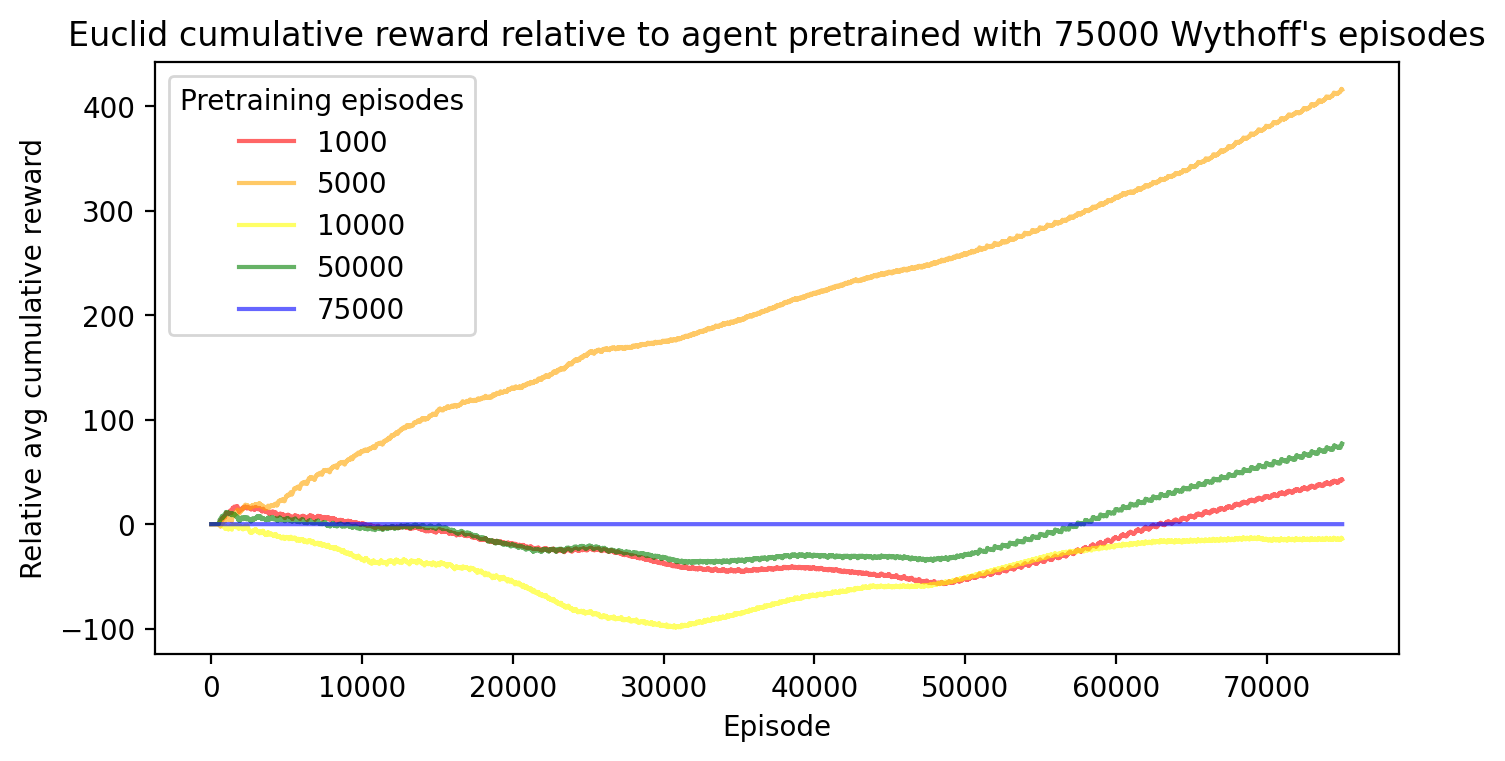

In [7]:
T = 5000
plt.figure(figsize=(7, 3.5))
plt.plot(episode_1000,   (exp_1000_avg-exp_28_avg), color="red",    alpha=0.6, label="1000")
plt.plot(episode_5000,   (exp_5000_avg-exp_28_avg), color="orange", alpha=0.6, label="5000")
plt.plot(episode_10000, (exp_10000_avg-exp_28_avg), color="yellow", alpha=0.6, label="10000")
plt.plot(episode_50000, (exp_50000_avg-exp_28_avg), color="green",  alpha=0.6, label="50000")
plt.plot(episode_28,       (exp_28_avg-exp_28_avg), color="blue",   alpha=0.6, label="75000")
_ = plt.legend(title="Pretraining episodes")
_ = plt.tight_layout()
# _ = plt.xlim(0, T)
# _ = plt.ylim(0, T)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Relative avg cumulative reward")
_ = plt.title("Euclid cumulative reward relative to agent pretrained with 75000 Wythoff\'s episodes")

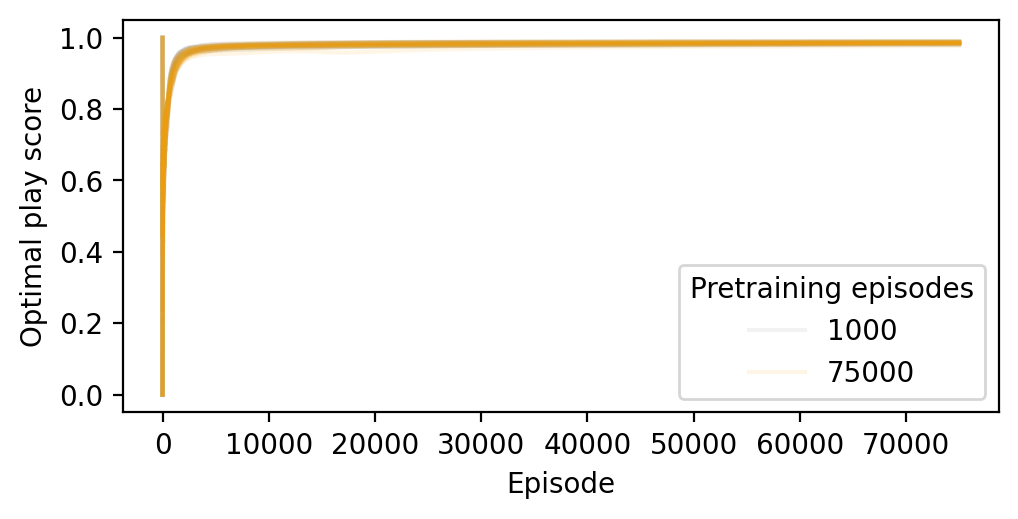

In [8]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_1000):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "1000"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=.1,  label=lab)

for n, mon in enumerate(exp_28):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "75000"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='orange', alpha=.1,  label=lab)

_ = plt.tight_layout()
_ = plt.legend(title='Pretraining episodes')
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

In [9]:
episode_1000,  exp_1000_avg,  _ = score_summary(exp_1000)
episode_5000,  exp_5000_avg,  _ = score_summary(exp_5000)
episode_10000, exp_10000_avg, _ = score_summary(exp_10000)
episode_50000, exp_50000_avg, _ = score_summary(exp_50000)
episode_28,    exp_28_avg,    _ = score_summary(exp_28)

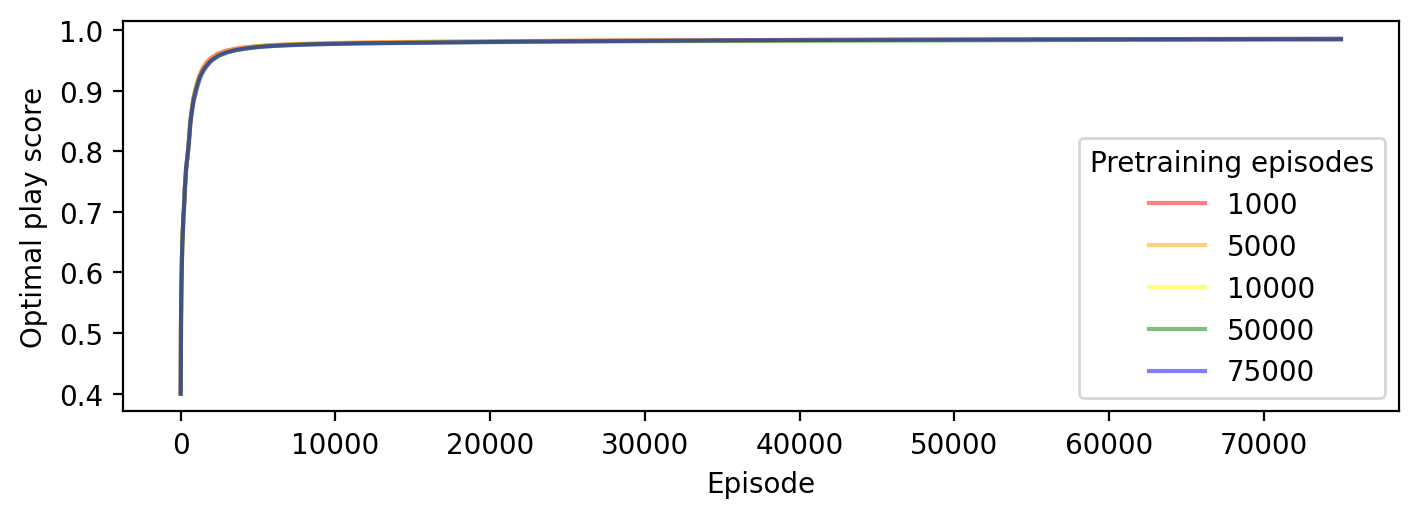

In [10]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_1000,  exp_1000_avg,  color='red',    alpha=.5, label="1000")
_ = plt.plot(episode_5000,  exp_5000_avg,  color='orange', alpha=.5, label="5000")
_ = plt.plot(episode_10000, exp_10000_avg, color='yellow', alpha=.5, label="10000")
_ = plt.plot(episode_50000, exp_50000_avg, color='green',  alpha=.5, label="50000")
_ = plt.plot(episode_28,    exp_28_avg,    color='blue',   alpha=.5, label="75000")
_ = plt.tight_layout()
_ = plt.legend(title="Pretraining episodes")
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

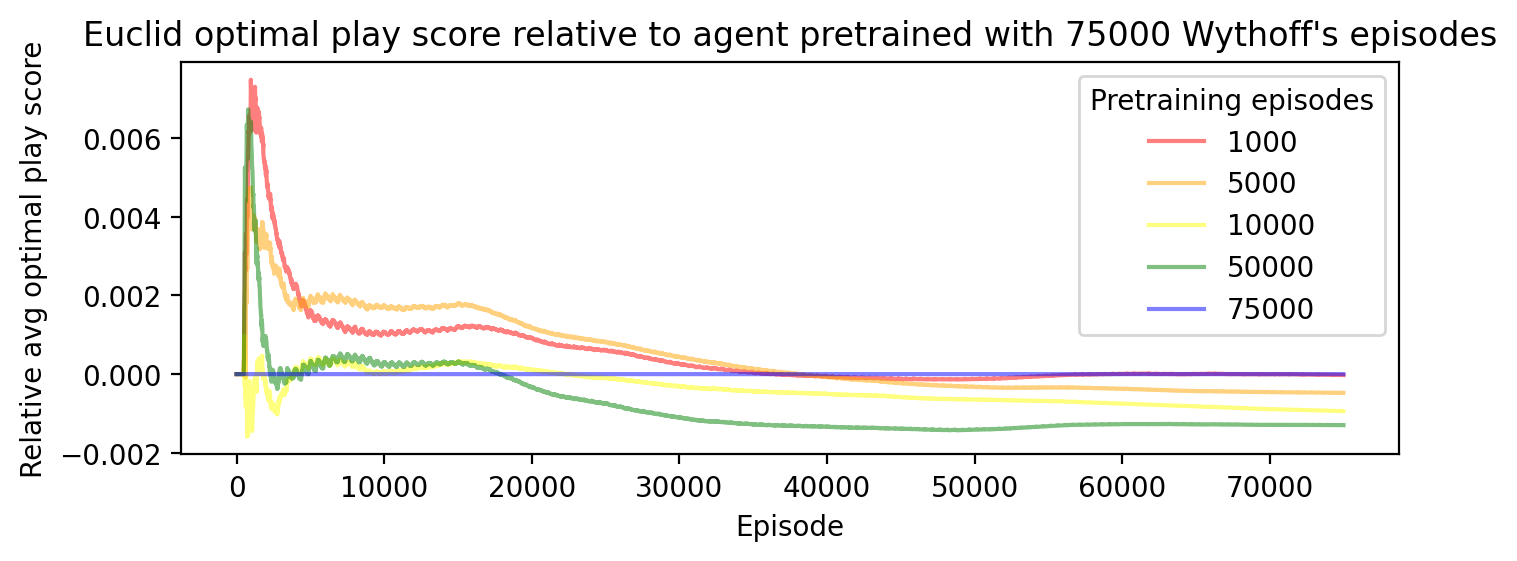

In [11]:
plt.figure(figsize=(7, 2.5))
_ = plt.plot(episode_1000,  exp_1000_avg  - exp_28_avg, color='red',    alpha=.5, label="1000")
_ = plt.plot(episode_5000,  exp_5000_avg  - exp_28_avg, color='orange', alpha=.5, label="5000")
_ = plt.plot(episode_10000, exp_10000_avg - exp_28_avg, color='yellow', alpha=.5, label="10000")
_ = plt.plot(episode_50000, exp_50000_avg - exp_28_avg, color='green',  alpha=.5, label="50000")
_ = plt.plot(episode_28,    exp_28_avg    - exp_28_avg, color='blue',   alpha=.5, label="75000")
_ = plt.tight_layout()
_ = plt.legend(title="Pretraining episodes")
_ = plt.xlabel("Episode")
_ = plt.ylabel("Relative avg optimal play score")
_ = plt.title("Euclid optimal play score relative to agent pretrained with 75000 Wythoff\'s episodes")